In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
#df1 = pd.read_excel('record_CT_201912_202003_batching.xlsx')
#df2 = pd.read_excel('record_201912_202003_80p_Batching_3d.xlsx')
#df3 = pd.read_excel('ins_2020_part3_batching.xlsx')

In [88]:
df1=pd.read_excel('record_201912_202003_80p_Batching_3d_singleobj_80p_CT.xlsx')
df_site = pd.read_excel('ins_2018_2020_part2_QuantileRules.xlsx')


In [89]:
df1.shape

(1041, 11)

In [90]:
df = df1.merge(df_site, on=['MRN','CreatedDate'], how='left')
df.columns

Index(['Unnamed: 0', 'MRN', 'Category', 'Intent', 'CreatedDate',
       'ModelWaitTime', 'CTWait', 'CTUnit', 'LinacUnit', 'TxDuration',
       'numFracs', 'SiteGroup', 'Intent1', 'Category_x', 'SimApptDuration',
       'TltDose', 'TxFracs', 'TxApptDuration', 'TxUnit', 'Team', 'CT',
       'linacs', 'TxStartDt', 'WaitTime', 'WaitTime(weekday)', 'priority',
       'targetWait', 'OverTargetWait', 'CreatedDay', 'Contr75p', 'Contr80p',
       'Contr90p', 'ContrM', 'Plan75p', 'Plan80p', 'Plan90p', 'PlanM',
       'preTxDays_75', 'preTxDays_80', 'preTxDays_90'],
      dtype='object')

In [91]:
df.shape

(1041, 40)

In [125]:
#df=df.merge(df3, on=['MRN','CreatedDate'])[['MRN', 'SiteGroup', 'Category', 'Intent', 'CreatedDate', 'ModelWaitTime', 'CTUnit',
#       'LinacUnit', 'TxDuration', 'numFracs', 'CTWait']]

In [92]:
sitegroups = df['SiteGroup'].unique()

In [93]:
categories = df['Category'].unique()

In [94]:
intents = df['Intent'].unique()

In [61]:
sitegroups

array(['GENITOURINARY(GU)', 'BREAST', 'SARCOMA', 'ENT (HEAD & NECK)',
       'LUNG', 'CNS', 'LYMPHOMA', 'GI LOWER', 'GI UPPER', 'GYNAE',
       'ENDOCRINE', 'EYE', 'SKIN', 'PAEDIATRIC'], dtype=object)

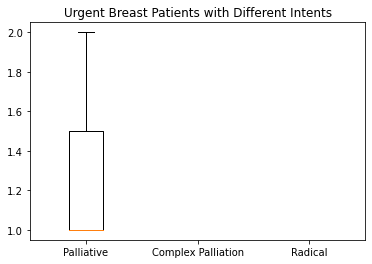

In [30]:
site = 'PAEDIATRIC'
cate = 'Urgent 2'
y = df[(df['SiteGroup']==site)&(df['Category']== cate)&(df['Intent']=='Palliative')]['CTWait']
y1 = df[(df['SiteGroup']==site)&(df['Category']==cate)&(df['Intent']=='Radical')]['CTWait']
y2 = df[(df['SiteGroup']==site)&(df['Category']==cate)&(df['Intent']=='Complex Palliation')]['CTWait']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data)
plt.title('Urgent Breast Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

In [95]:
df_CT_all = pd.DataFrame(columns=['sitegroup','category','intent','CTWait'])
# fill in df_CT_all with avg of [category, intent] group
for s in sitegroups:
    for c in categories:
        for i in intents:
            avg = df[(df['Category']==c)&(df['Intent']==i)]['CTWait'].mean()
            series_obj = pd.Series([s, c, i, avg], index=df_CT_all.columns )
            df_CT_all = df_CT_all.append(series_obj, ignore_index=True)
df_CT_all

,sitegroup,category,intent,CTWait
0,GENITOURINARY(GU),Urgent 2,Palliative,1.985915
1,GENITOURINARY(GU),Urgent 2,Radical,4.050000
2,GENITOURINARY(GU),Urgent 2,Complex Palliation,2.228571
3,GENITOURINARY(GU),Standard 3,Palliative,2.955882
4,GENITOURINARY(GU),Standard 3,Radical,3.098456
...,...,...,...,...
79,PAEDIATRIC,Urgent 2,Radical,4.050000
80,PAEDIATRIC,Urgent 2,Complex Palliation,2.228571
81,PAEDIATRIC,Standard 3,Palliative,2.955882
82,PAEDIATRIC,Standard 3,Radical,3.098456


In [96]:
import math
#list_CTWait = []
df_CT = df_CT_all
for s in sitegroups:
    for c in categories:
        for i in intents:
            ctWait = df[(df['SiteGroup']==s)&(df['Category']==c)&(df['Intent']==i)]['CTWait'].mean()
            #list_CTWait.append([s,c,i,ctWait])
            if math.isnan(ctWait)==False:
                df_CT.loc[(df_CT['sitegroup']==s)&(df_CT['category']==c)&(df_CT['intent']==i), 
                          ['CTWait']] = ctWait
df_CT           
#df_CT = pd.DataFrame(list_CTWait, columns=['sitegroup','category','intent','ctWait'])
df_CT.to_excel('heuristics_CTWait_mean_MIP.xlsx')

In [97]:
df_total_all = pd.DataFrame(columns=['sitegroup','category','intent','totalWait'])
# fill in df_CT_all with avg of [category, intent] group
for s in sitegroups:
    for c in categories:
        for i in intents:
            avg = df[(df['Category']==c)&(df['Intent']==i)]['ModelWaitTime'].mean()
            series_obj = pd.Series([s, c, i, avg], index = df_total_all.columns)
            df_total_all = df_total_all.append(series_obj, ignore_index=True)

In [98]:
#list_totalWait=[]
df_total = df_total_all
for s in sitegroups:
    for c in categories:
        for i in intents:
            totalWait = df[(df['SiteGroup']==s)&(df['Category']==c)&(df['Intent']==i)]['ModelWaitTime'].mean()
            #list_totalWait.append([s,c,i,totalWait])
            if math.isnan(totalWait)==False:
                df_total.loc[(df_total['sitegroup']==s)&(df_total['category']==c)&(df_total['intent']==i), 
                             ['totalWait']] = totalWait
                
#df_total = pd.DataFrame(list_totalWait, columns=['sitegroup','category','intent','totalWait'])
df_total.to_excel('heuristics_totalWait_mean_MIP.xlsx')

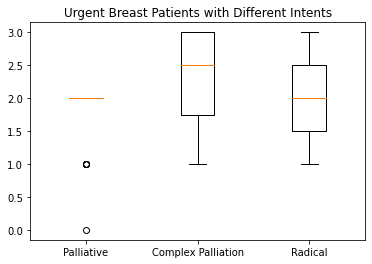

In [79]:
y = df[(df['SiteGroup']=='BREAST')&(df['Category']=='Urgent 2')&(df['Intent']=='Palliative')]['ModelWaitTime']
y1 = df[(df['SiteGroup']=='BREAST')&(df['Category']=='Urgent 2')&(df['Intent']=='Radical')]['ModelWaitTime']
y2 = df[(df['SiteGroup']=='BREAST')&(df['Category']=='Urgent 2')&(df['Intent']=='Complex Palliation')]['ModelWaitTime']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data)
plt.title('Urgent Breast Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

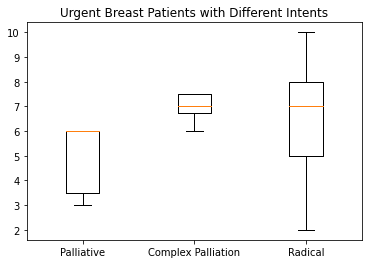

In [80]:
y = df[(df['SiteGroup']=='BREAST')&(df['Category']=='Standard 3')&(df['Intent']=='Palliative')]['ModelWaitTime']
y1 = df[(df['SiteGroup']=='BREAST')&(df['Category']=='Standard 3')&(df['Intent']=='Radical')]['ModelWaitTime']
y2 = df[(df['SiteGroup']=='BREAST')&(df['Category']=='Standard 3')&(df['Intent']=='Complex Palliation')]['ModelWaitTime']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data, showfliers=False)
plt.title('Urgent Breast Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

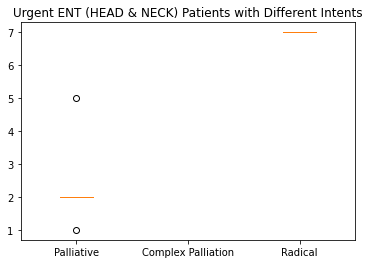

In [81]:
y = df[(df['SiteGroup']=='ENT (HEAD & NECK)')&(df['Category']=='Urgent 2')&(df['Intent']=='Palliative')]['ModelWaitTime']
y1 = df[(df['SiteGroup']=='ENT (HEAD & NECK)')&(df['Category']=='Urgent 2')&(df['Intent']=='Radical')]['ModelWaitTime']
y2 = df[(df['SiteGroup']=='ENT (HEAD & NECK)')&(df['Category']=='Urgent 2')&(df['Intent']=='Complex Palliation')]['ModelWaitTime']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data)
plt.title('Urgent ENT (HEAD & NECK) Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

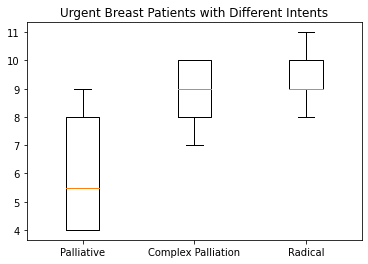

In [82]:
y = df[(df['SiteGroup']=='ENT (HEAD & NECK)')&(df['Category']=='Standard 3')&(df['Intent']=='Palliative')]['ModelWaitTime']
y1 = df[(df['SiteGroup']=='ENT (HEAD & NECK)')&(df['Category']=='Standard 3')&(df['Intent']=='Radical')]['ModelWaitTime']
y2 = df[(df['SiteGroup']=='ENT (HEAD & NECK)')&(df['Category']=='Standard 3')&(df['Intent']=='Complex Palliation')]['ModelWaitTime']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data, showfliers=False)
plt.title('Urgent Breast Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

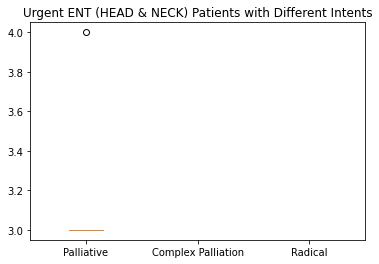

In [38]:
y = df[(df['SiteGroup']=='GI LOWER')&(df['Category']=='Urgent 2')&(df['Intent']=='Palliative')]['ModelWaitTime']
y1 = df[(df['SiteGroup']=='GI LOWER')&(df['Category']=='Urgent 2')&(df['Intent']=='Radical')]['ModelWaitTime']
y2 = df[(df['SiteGroup']=='GI LOWER')&(df['Category']=='Urgent 2')&(df['Intent']=='Complex Palliation')]['ModelWaitTime']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data)
plt.title('Urgent ENT (HEAD & NECK) Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

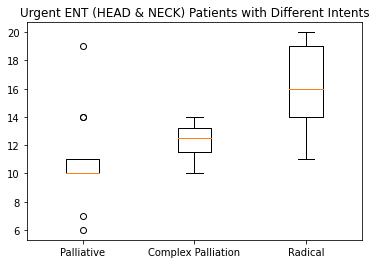

In [135]:
y = df[(df['SiteGroup']=='GI LOWER')&(df['Category']=='Standard 3')&(df['Intent']=='Palliative')]['ModelWaitTime']
y1 = df[(df['SiteGroup']=='GI LOWER')&(df['Category']=='Standard 3')&(df['Intent']=='Radical')]['ModelWaitTime']
y2 = df[(df['SiteGroup']=='GI LOWER')&(df['Category']=='Standard 3')&(df['Intent']=='Complex Palliation')]['ModelWaitTime']
data = [y, y2, y1]
#fig7, ax7 = plt.subplots()
#plt.set_title('Urgent Breast Patients with Different Intents')
plt.boxplot(data)
plt.title('Urgent ENT (HEAD & NECK) Patients with Different Intents')
plt.xticks([1, 2, 3], ['Palliative', 'Complex Palliation','Radical'])
plt.show()

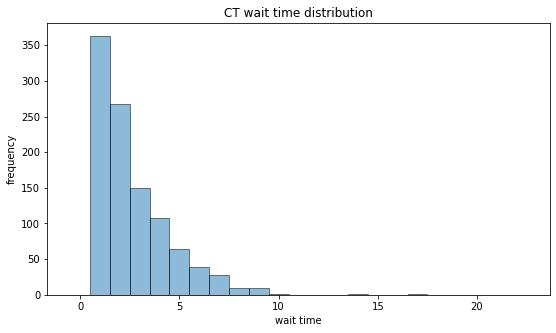

In [83]:
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df['CTWait']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('CT wait time distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


(array([605.,   0., 204.,   0.,   0.,  87.,   0.,   0.,  42.,   0.,  31.,
          0.,   0.,  59.,   0.,  14.]),
 array([1.   , 1.375, 1.75 , 2.125, 2.5  , 2.875, 3.25 , 3.625, 4.   ,
        4.375, 4.75 , 5.125, 5.5  , 5.875, 6.25 , 6.625, 7.   ]),
 <BarContainer object of 16 artists>)

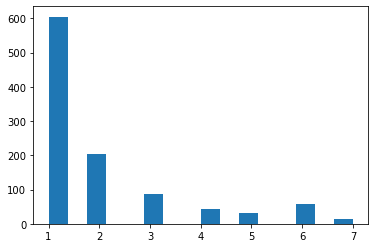

In [40]:
plt.hist(df['CTWait'], bins=16)
